In [33]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar  9 14:52:22 2021

@author: Nathan
"""


import pandas as pd
import numpy as np

import matplotlib as mpl 
import matplotlib.pyplot as plt  
import interactive_plot as ip

import scipy as sp 
from scipy.optimize import curve_fit 


N = 4000 # number of samples per data frame

# steady state amplitude
def res(f,C,f0,gamma):
    term1 = (2*np.pi*f0)**2 - (2*np.pi*f)**2
    term2 = 2*gamma*2*np.pi*f
    denom = np.sqrt(term1**2 + term2**2)
    return C/denom
    

freq = [0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.725,0.750,0.775,0.8,0.825,0.85,0.875,0.9,1.0,1.1,1.2,1.3] # array of driving frequencies
max_amp_arr = [] # empty array to store max amplitude values


for i in range(0, len(freq)):
    f = freq[i]
    dresonance= pd.read_csv("{} hz.lvm".format(freq[i]), comment = '#', delim_whitespace=True, 
                            names=['time (s)', 'ang vel', 'ang position (theta)'])
    t = dresonance['ang position (theta)']
    t_max = np.amax(t)
    t_min = np.amin(t)
    t_max = abs(t_max - t_min)/2
    max_amp_arr.append(t_max)

for i in range(len(max_amp_arr)):
    print('i = ', i, max_amp_arr[i], 'f = ', freq[i])


# xaxis = np.linspace(0.1, 1.4, 13)
# plt.plot(xaxis, max_amp_arr)
    
# Fitting Routine    
#, ['Parameter symbol', slider start value, slider end value, slider initial value, and slider step size]
fitparams = [['C',0.01,10,0.1,0.001],['f0',0.1,2,1,0.001],['gamma',0.001,5,0.1,0.001]]
function = res  #name of fit function
plotparams = [['x',0,1.4],['y',0,0.4],[500]] #set scales for plot. 500 points.
xData = freq #array containing freqency values
yData = max_amp_arr #array containing amplitude values
xErr = None
yErr = None

%matplotlib qt
ip.slider_plot(fitparams,function,plotparams,xData,yData,xErr,yErr)



i =  0 0.05860549999999998 f =  0.1
i =  1 0.059242499999999976 f =  0.2
i =  2 0.06306450000000002 f =  0.3
i =  3 0.06816050000000001 f =  0.4
i =  4 0.07898949999999999 f =  0.5
i =  5 0.10128550000000003 f =  0.6
i =  6 0.1509725 f =  0.7
i =  7 0.167535 f =  0.725
i =  8 0.1981115 f =  0.75
i =  9 0.252895 f =  0.775
i =  10 0.3408030000000001 f =  0.8
i =  11 0.522989 f =  0.825
i =  12 1.291229 f =  0.85
i =  13 1.163189 f =  0.875
i =  14 0.516619 f =  0.9
i =  15 0.14523949999999997 f =  1.0
i =  16 0.08918199999999998 f =  1.1
i =  17 0.059879499999999974 f =  1.2
i =  18 0.04650199999999999 f =  1.3


C,f0,gamma [1.40529251 0.86164247 0.07097889]


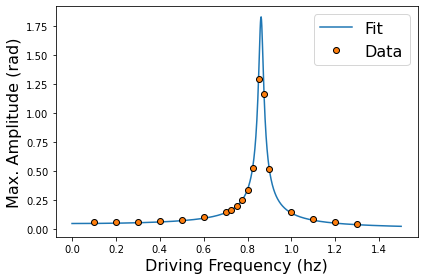

In [34]:
guess = [1.676, 0.877, 0.108]

# Generate best fit parameters with guess
popt, pcov = curve_fit(res, freq, max_amp_arr)
print("C,f0,gamma", popt)

xFit = np.linspace(0, 1.5, 1000)
yFit = res(xFit, *popt)

%matplotlib inthe datline
plt.plot(xFit, yFit, label='Fit')
plt.plot(freq, max_amp_arr, label='Data', marker='o', linestyle='None', mec='black')
plt.xlabel("Driving Frequency (hz)", fontsize=16)
plt.ylabel("Max. Amplitude (rad)", fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('Driven Resonance (PDF).pdf', format='pdf')
plt.savefig('Driven Resonance (SVG).svg', format='svg')
plt.show()

In [25]:
t = 0
res_freq = 0

for i in range(0, len(yFit)):
    if yFit[i] > t:
        t = yFit[i]
        res_freq = xFit[i]
        
print(t, res_freq)

1.8277136591207104 0.8618618618618619
